In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import geopandas as gpd
import scipy.stats as sc

In [3]:
data = pd.read_csv('/home/slindhult/assignments/Capstone-1/Data/pollution_us_2000_2016.csv')

In [13]:
cols_list = ['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
a = data.copy()
purged = a[(a[['NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour']] >=0).all(1)]

cleaned = purged.drop(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'County', 'City', 'NO2 Units',
       'O3 Units',
       'SO2 Units',
       
       'CO Units'], axis=1)
cleaned['Date'] = cleaned['Date Local']

clean = cleaned.groupby(['Date Local', 'Address','State']).agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})
clean = clean.reset_index()
clean.drop(['Address'],axis=1)

,Date Local,State,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,2000-01-01,Virginia,31.000000,41.0,23.0,39.0,0.002750,0.006,11.0,5.0,11.645834,16.8,10.0,26.0,1.244518,1.5000,2.5,16.0
1,2000-01-01,California,5.272727,19.0,17.0,18.0,0.025917,0.028,14.0,24.0,2.524026,5.5,17.0,10.0,0.270933,0.3000,5.0,3.0
2,2000-01-01,California,17.652174,27.0,2.0,25.0,0.019333,0.029,14.0,25.0,2.338961,3.0,8.0,4.0,0.447343,0.7000,4.0,7.0
3,2000-01-01,California,9.304348,24.0,7.0,23.0,0.032917,0.041,10.0,35.0,0.402795,2.3,9.5,4.0,0.466787,1.0000,9.0,9.0
4,2000-01-01,Louisiana,31.083333,72.0,18.0,70.0,0.023350,0.038,10.0,32.0,7.737500,12.3,2.0,21.0,0.845943,1.5000,20.5,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407552,2016-05-31,Iowa,5.390909,11.5,1.0,10.0,0.032895,0.042,10.0,39.0,0.077019,0.4,10.5,0.0,0.196568,0.2185,3.0,2.0
407553,2016-05-31,North Carolina,5.787500,12.6,21.0,11.0,0.034526,0.046,9.0,43.0,0.288509,0.8,21.5,1.0,0.193937,0.2240,10.0,2.0
407554,2016-05-31,Iowa,5.775000,16.8,20.0,15.0,0.035210,0.043,7.0,40.0,0.000000,0.0,1.0,0.0,0.208228,0.3850,20.5,3.0
407555,2016-05-31,Maine,4.404167,11.8,22.0,10.0,0.031842,0.043,9.0,40.0,0.062500,0.2,21.0,0.0,0.266583,0.3250,4.5,3.0


In [25]:
lst2=[]

for col in clean.columns:
    lst2.append((col, clean[col].isnull().sum()))
lst2

[('Date Local', 0),
 ('Address', 0),
 ('State', 0),
 ('NO2 Mean', 0),
 ('NO2 1st Max Value', 0),
 ('NO2 1st Max Hour', 0),
 ('NO2 AQI', 0),
 ('O3 Mean', 0),
 ('O3 1st Max Value', 0),
 ('O3 1st Max Hour', 0),
 ('O3 AQI', 0),
 ('SO2 Mean', 0),
 ('SO2 1st Max Value', 0),
 ('SO2 1st Max Hour', 0),
 ('SO2 AQI', 589),
 ('CO Mean', 0),
 ('CO 1st Max Value', 0),
 ('CO 1st Max Hour', 0),
 ('CO AQI', 225)]

In [4]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [5]:
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [6]:
total = s[['NO2 AQI',
       'O3 AQI', 'SO2 AQI', 'CO AQI']].copy()

In [7]:
contiguous_usa = gpd.read_file('/home/slindhult/assignments/Capstone-1/data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
contiguous_usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [8]:
contiguous_usa=contiguous_usa.rename(columns={'NAME': 'State'})


In [15]:
merged.index

Index(['Maryland', 'Iowa', 'Delaware', 'Ohio', 'Pennsylvania', 'Nebraska',
       'Washington', 'Puerto Rico', 'Alabama', 'Arkansas', 'New Mexico',
       'Texas', 'California', 'Kentucky', 'Georgia', 'Wisconsin', 'Oregon',
       'Missouri', 'Virginia', 'Tennessee', 'Louisiana', 'New York',
       'Michigan', 'Idaho', 'Florida', 'Illinois', 'Montana', 'Minnesota',
       'Indiana', 'Massachusetts', 'Kansas', 'Nevada', 'Vermont',
       'Connecticut', 'New Jersey', 'District of Columbia', 'North Carolina',
       'Utah', 'North Dakota', 'South Carolina', 'Mississippi', 'Colorado',
       'South Dakota', 'Oklahoma', 'Wyoming', 'West Virginia', 'Maine',
       'New Hampshire', 'Arizona', 'Rhode Island'],
      dtype='object', name='State')

In [11]:
merged = contiguous_usa.set_index('State').join(s2)


In [12]:

merged = merged.loc[~merged.index.isin(['Alaska', 'Hawaii'])]


In [13]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = merged.to_json())

In [17]:

'''# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40)
# Define custom tick labels for color bar.
tick_labels = {'0':'0','3': '3', '5': '5',
 '10':'10', '15':'15',
 '20':'20', '25':'25',
 '30':'30', '35':'35+'}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)'''

# Create figure object.
p = figure(title = 'Average Air Pollution Levels, 2000-2016', 
           plot_height = 600 ,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = 'pan,wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   #fill_color = {'field':'NO2_AQI', 'transform': color_mapper},
                   line_color = 'black', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@index'),
                                ('NO2_AQI','NO2_AQI')]))
#p.add_layout(color_bar, 'below')
show(p)





In [ ]:
# Added bins for AQI rating scale
purged['SO2 AQI Level'] = pd.cut(purged['SO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['NO2 AQI Level'] = pd.cut(purged['NO2 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['O3 AQI Level'] = pd.cut(purged['O3 AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])
purged['CO AQI Level'] = pd.cut(purged['CO AQI'], bins=[0,50,100,150,200,300,500], labels = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous'])

In [ ]:
#purged['Date Local']=pd.to_datetime(purged['Date Local'])

In [ ]:
purged.head()

In [ ]:
aqi = purged[['Date Local','SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']]

In [ ]:
aqi['year'] = aqi['Date Local'].apply(lambda x: x[:4])

In [ ]:
aqi.drop(['Date Local'],axis=1)

In [ ]:
test = aqi.agg({'SO2 AQI Level':'value_counts','NO2 AQI Level':'value_counts','O3 AQI Level':'value_counts','CO AQI Level':'value_counts'})

In [ ]:
groups = ['Good','Moderate','Unhealthy for Sensitive Groups','Unhealthy','Very Unhealthy','Hazardous']
cols = [O2 AQI Leve]
test_list = []
for col in cols:
    for i in groups:
        test_list.append((col, aqi[col].value_counts()))

In [ ]:
test.head()

In [ ]:
test.index

In [ ]:
#year by year number of grouped days
fig, axs = plt.subplots(4,1,figsize=(20,20))

cols = ['SO2 AQI Level','NO2 AQI Level','O3 AQI Level','CO AQI Level']
axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].bar(test.index,test[col], width=.8,)
    axs[i].set_title(col)
    axs[i].set_yscale('log')
fig.tight_layout() 

In [ ]:
test.plot.bar();
plt.ylabel('Log Days in Category')
plt.yscale('log')

In [ ]:
cols = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']
fig, axs = plt.subplots(16,1,figsize=(10,20))

axs=axs.flatten()
for i, col in enumerate(cols):   
    axs[i].plot(s.index,s[col])
    axs[i].set_title(col)
    axs[i].set_xticklabels(labels=s.index,rotation=45)


In [ ]:
purged['year'] = purged['Date Local'].apply(lambda x: x[:4])

In [ ]:
year = purged[['State',
         'NO2 Mean', 'NO2 AQI',
       'O3 Mean','O3 AQI',
       'SO2 Mean','SO2 AQI',
        'CO Mean','CO AQI', 'year']].copy()

In [ ]:
# Mean pollutants
y = year.groupby(['year','State']).agg({'NO2 Mean':'mean',
       'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO AQI':'mean'})

In [ ]:
states=year['State'].unique()

In [ ]:
for state in states:
    state = year[(year[['State']]==state).any(1)]

In [ ]:
state = purged[[
       'State', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
        'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']].copy()

In [ ]:
# Mean pollutants
s = state.groupby('State').agg({'NO2 Mean':'mean',
       'NO2 1st Max Value':'mean', 'NO2 1st Max Hour':'mean', 'NO2 AQI':'mean',
       'O3 Mean':'mean', 'O3 1st Max Value':'mean', 'O3 1st Max Hour':'mean', 'O3 AQI':'mean',
       'SO2 Mean':'mean', 'SO2 1st Max Value':'mean', 'SO2 1st Max Hour':'mean', 'SO2 AQI':'mean',
        'CO Mean':'mean', 'CO 1st Max Value':'mean', 'CO 1st Max Hour':'mean', 'CO AQI':'mean'})

In [9]:
montana = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
vermont = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
mississippi = pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
add_states = pd.DataFrame([montana, vermont, mississippi],index = ['Montana', 'Vermont', 'Mississippi'])
add_states

add_states = add_states.rename(columns={0:'NO2 Mean', 1:'NO2 1st Max Value', 2:'NO2 1st Max Hour', 3:'NO2 AQI',
       4:'O3 Mean', 5:'O3 1st Max Value', 6:'O3 1st Max Hour', 7:'O3 AQI', 8:'SO2 Mean',
       9:'SO2 1st Max Value', 10:'SO2 1st Max Hour', 11:'SO2 AQI', 12:'CO Mean',
       13:'CO 1st Max Value', 14:'CO 1st Max Hour', 15:'CO AQI'})

In [10]:
s2 = s.append(add_states)


In [ ]:
joined = joined.loc[~joined.index.isin(['Alaska', 'Hawaii'])]

In [ ]:
s2['Total'] = s2['NO2 AQI'] + s2['O3 AQI'] + s2['CO AQI'] + s2['SO2 AQI']

In [ ]:
s2.sort_values('Total', ascending=False)

In [33]:
month = clean.copy()
month['Date Local'] = pd.to_datetime(month['Date Local'], format="%Y-%m-%d")

In [35]:
month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407557 entries, 0 to 407556
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date Local         407557 non-null  datetime64[ns]
 1   Address            407557 non-null  object        
 2   State              407557 non-null  object        
 3   NO2 Mean           407557 non-null  float64       
 4   NO2 1st Max Value  407557 non-null  float64       
 5   NO2 1st Max Hour   407557 non-null  float64       
 6   NO2 AQI            407557 non-null  float64       
 7   O3 Mean            407557 non-null  float64       
 8   O3 1st Max Value   407557 non-null  float64       
 9   O3 1st Max Hour    407557 non-null  float64       
 10  O3 AQI             407557 non-null  float64       
 11  SO2 Mean           407557 non-null  float64       
 12  SO2 1st Max Value  407557 non-null  float64       
 13  SO2 1st Max Hour   407557 non-null  float64 

In [63]:
month=month.groupby([(month['Date Local'].dt.year),(month['Date Local'].dt.month)]).mean()

KeyError: 'Date Local'

In [68]:
month = month.reset_index(1)



In [70]:
month.rename(columns={'Date Local': 'Month'}, inplace=True)

In [73]:
month = month.reset_index()

In [75]:
month.rename(columns={'Date Local': 'Year'}, inplace=True)

In [97]:
month.columns

Index(['Year', 'Month', 'NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

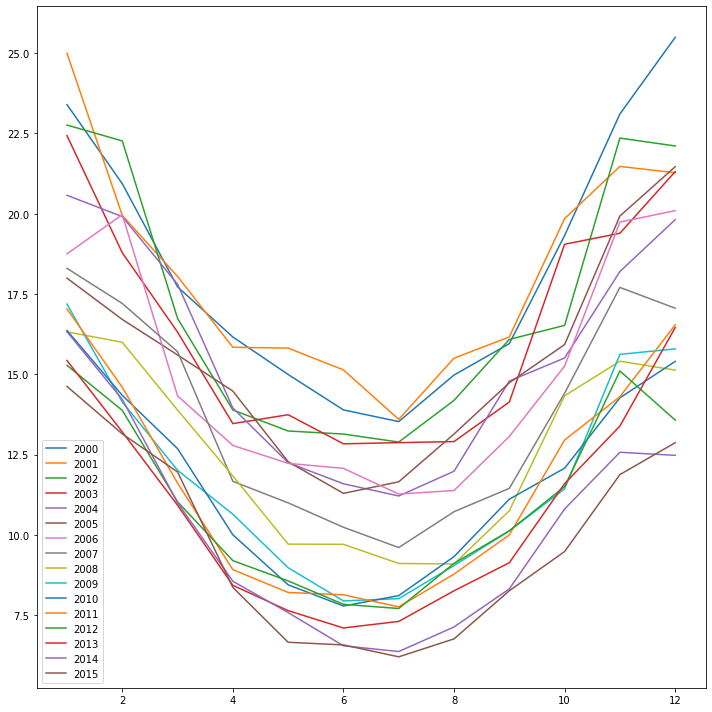

In [85]:
columns = ['NO2 Mean']


fig, ax = plt.subplots(figsize=(10,10))

for i in range(2000,2016):
    df = month[(month[['Year']] == i).any(1)]
    for col in columns:
        ax.plot(df['Month'],df[col], label=i)




ax.legend()

fig.tight_layout() 

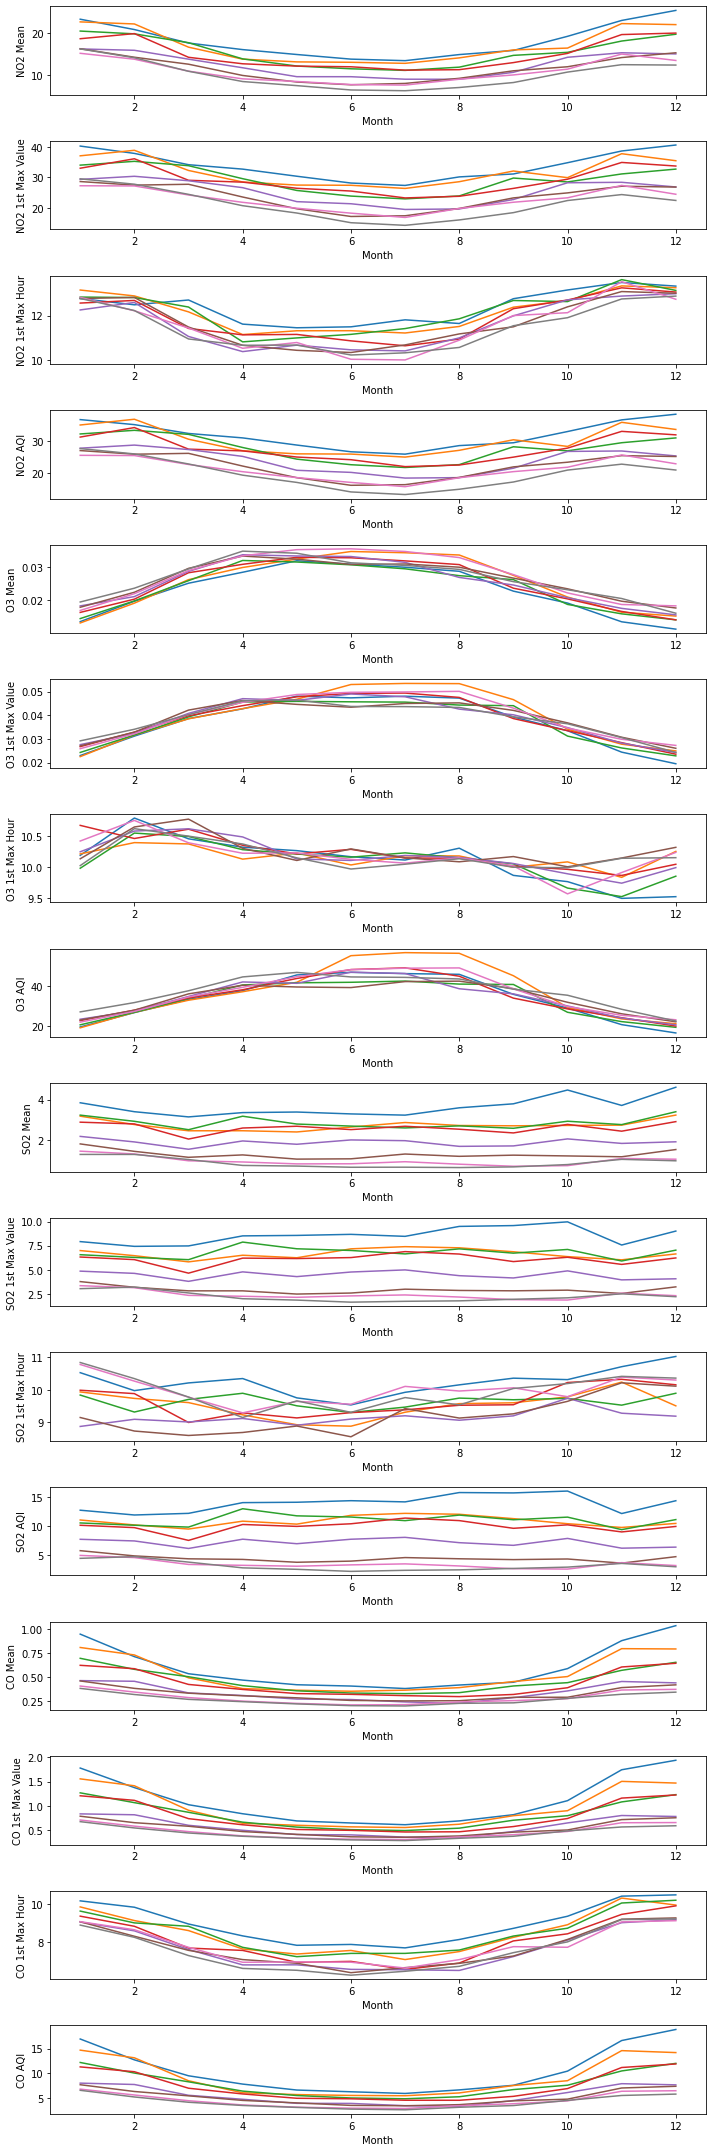

In [90]:
columns = ['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour',
       'NO2 AQI', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI']


fig, axs = plt.subplots(16,1, figsize=(10,30))


for i in range(2000,2016,2):
    df = month[(month[['Year']] == i).any(1)]
    for i, col in enumerate(columns):
        axs[i].plot(df['Month'],df[col], label=i)
        axs[i].set_xlabel('Month')
        axs[i].set_ylabel(col)




ax.legend()

fig.tight_layout() 

In [98]:
pd.plotting.autocorrelation_plot(month["NO2 Mean"].resample("1m").median())

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [100]:
dt = clean.copy()
dt['Date Local'] = pd.to_datetime(dt['Date Local'], format="%Y-%m-%d")

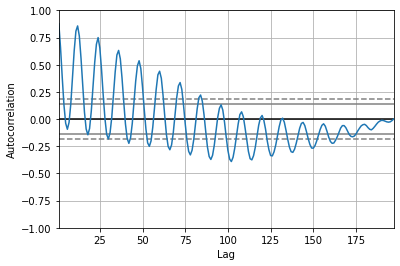

In [132]:
pd.plotting.autocorrelation_plot(dt["NO2 Mean"].resample("1m").median())

In [106]:
dt.index = dt['Date Local']

In [115]:
import numpy as np
np.corrcoef((clean['NO2 Mean'], clean['NO2 1st Max Value'], clean['NO2 1st Max Hour'],
       clean['NO2 AQI'], clean['O3 Mean'], clean['O3 1st Max Value'], clean['O3 1st Max Hour'], clean['O3 AQI'],
       clean['SO2 Mean'], clean['SO2 1st Max Value'], clean['SO2 1st Max Hour'], clean['SO2 AQI'],
      clean['CO Mean'], clean['CO 1st Max Value'], clean['CO 1st Max Hour'], clean['CO AQI'])

SyntaxError: unexpected EOF while parsing (<ipython-input-115-a7c3e92a5082>, line 5)

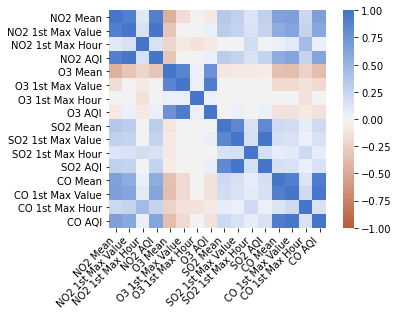

In [130]:
import seaborn as sns
corr = clean.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 255, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
data = dict(type='choropleth',
            locations = winterdf['code'],
            z = winterdf['CO Mean'],
            locationmode = 'USA-states',
            text = winterdf['text'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"CO Mean in ppm"}
            ) 
layout = dict(title = 'CO Mean Value in Winter by State',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)